In [1]:
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pandas as pd
from growth.sweep.sweep import Sweep
from clones.validation.sweep import SweepBenchmark
from clones.visualization.settings import *
%matplotlib inline

In [2]:
figsize = (2, 2)
savedir = './graphics/synthetic/'
savefig = lambda fig, name: fig.savefig(join(savedir, '{:s}.pdf'.format(name)), dpi=400, rasterized=True, transparent=True)

In [3]:
ls ../../../data/synthetic/

aggregate.py    growth_example/ old/
build_sweep.py  landing/        sweeps/


# Culture growth example

In [2]:
from growth.sweep.simulation import GrowthSimulation
simulation = GrowthSimulation.load('../../../data/synthetic/growth_example/')

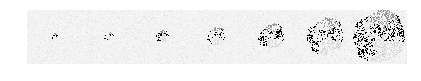

In [6]:
size = 1
min_gen = 5

# define grid
nrows = 1
ncols = simulation.min_population - min_gen + 1
fig = plt.figure(figsize=(ncols*size-0.2, nrows*size))
gs = GridSpec(nrows, ncols, wspace=0., hspace=0.)


# visualize first generation exceeding each population threshold
i = 0
simulations = []
for t, cells in enumerate(simulation.history):
    n = len(cells)    
    if np.log2(n) >= min_gen:
        ax = fig.add_subplot(gs[i])
        image = simulation.branch(t).generate_microscopy(0., 0., 0.)[1]
        image.render(ax=ax)
        i += 1
        min_gen += 1

In [ ]:
#savefig(fig, 'growth_strip')

# Varying recombination period

In [15]:
sweep = Sweep.load('../../../data/synthetic/sweeps/growth_conditions/')

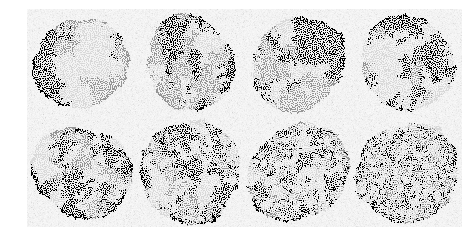

In [16]:
nrows = 2
ncols = 4
size = 2
row = 1

fig = plt.figure(figsize=(ncols*size-0.2, nrows*size))
gs = GridSpec(nrows, ncols, wspace=0., hspace=0.)
axes = [fig.add_subplot(gs[i]) for i in range(nrows*ncols)]
for i, ax in enumerate(axes):
    image = sweep[i+row*nrows*ncols].generate_microscopy(0., 0., 0.)[1]
    _ = image.render(ax=ax)

#savefig(fig, 'recombination_timing')

# Simulated cell growth trends

In [3]:
from clones.validation.growth import GrowthTrends

In [4]:
sweep_4gen = Sweep.load('../../../data/synthetic/sweeps/Sweep_181201_191516/')
sweep_2gen = Sweep.load('../../../data/synthetic/sweeps/Sweep_181201_191521/')
trends_4gen = GrowthTrends(sweep_4gen._results)
trends_2gen = GrowthTrends(sweep_2gen._results)

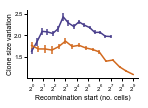

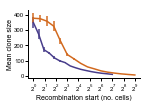

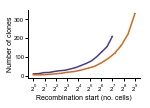

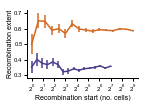

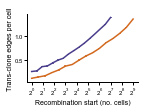

In [5]:
# plot each trend
for yvar in sorted(trends_4gen.ylabels.keys()):
    fig, ax = plt.subplots(figsize=(2., 1.25))
    _ = trends_4gen.plot_trend(yvar, ax=ax, color='darkslateblue')
    _ = trends_2gen.plot_trend(yvar, ax=ax, color='chocolate')
    #savefig(fig, yvar)

In [84]:
x = np.arange(10)

In [88]:
[x[10-i-1] for i in range(10)]

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

# Fluroescence model

In [3]:
path = '../../../data/synthetic/sweeps/Sweep_181201_191516/'
sweep = Sweep.load(path)
benchmarks = SweepBenchmark.load(path)

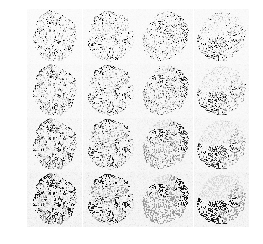

In [37]:
resolution = 4
size = 1
replicate_id = 0

ncols = sweep.num_periods // resolution
nrows = benchmarks.num_ambiguities // resolution

# create figure
fig = plt.figure(figsize=(ncols*size, nrows*size))
gs = GridSpec(nrows, ncols, wspace=0., hspace=0.)
axes = [[fig.add_subplot(gs[i*ncols+j]) for j in range(ncols)] for i in range(nrows)]

for i in range(nrows):    
    for j in range(ncols):

        # get indices and axis
        ax = axes[nrows-i-1][ncols-j-1]        
        ii = i*resolution
        jj = j*resolution
        
        # load simulation and benchmark
        simulation = sweep.batches[0, jj][replicate_id]
        benchmark = benchmarks.load_benchmark(jj, ii)
        
        # render image
        image = simulation.generate_microscopy(benchmark.ambiguity, 0., 0.)[1]
        _ = image.render(ax=ax)

savefig(fig, 'benchmarking_images_4x4')

In [4]:
from growth.measure.sampling import MultiLognormalSampler

0.9400000000000001
0.8200000000000001
0.7000000000000001
0.5800000000000001
0.4600000000000001
0.34
0.22000000000000003
0.1


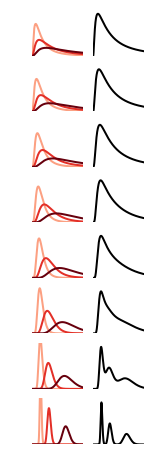

In [39]:
resolution = 2
size = 1
cmap = plt.cm.Reds

# create figure
nrows = benchmarks.num_ambiguities // resolution
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(size*2, nrows*size))
for i, ax_row in enumerate(axes):
    ii = (nrows-i-1)*resolution
    ambiguity = benchmarks.load_benchmark(0, ii).ambiguity
    sampler = MultiLognormalSampler(ambiguity)
    sampler.show_pdf(ax=ax_row[0], cmap=cmap, component_lw=2, include_composite=False)
    sampler.show_pdf(ax=ax_row[1], composite_lw=2, include_components=False)
    for ax in ax_row:
        if i != nrows-1:
            ax.set_xticks([])
        ax.axis('off')
        ax.set_xlim(0, 3)
        ax.set_ylim()
    ax_row[1].set_ylim(top=1.1*ax_row[1].dataLim.bounds[-1])
    print(ambiguity)

# savefig(fig, 'fluorescence_models')

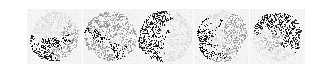

In [56]:
num_replicates = 5
size = 1

# create figure
fig = plt.figure(figsize=(num_replicates*size, size))
gs = GridSpec(1, num_replicates, wspace=0., hspace=0.)
axes = [fig.add_subplot(gs[i]) for i in range(num_replicates)]

# get indices and axis
i, j = 0, 0
ii = i*resolution
jj = j*resolution

replicate_ids = np.hstack(([0], np.random.randint(0, 50, size=num_replicates-1)))
for j in range(num_replicates):
    
    ax = axes[j]

    # load simulation and benchmark
    simulation = sweep.batches[0, jj][replicate_ids[j]]
    benchmark = benchmarks.load_benchmark(jj, ii)

    # render image
    image = simulation.generate_microscopy(benchmark.ambiguity, 0., 0.)[1]
    _ = image.render(ax=ax)

#savefig(fig, 'replicates')

In [59]:
replicate_ids = [ 0, 28, 42, 26, 19]

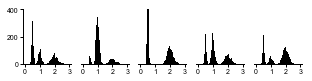

In [77]:
ambiguity = 0.1

# create figure
fig = plt.figure(figsize=(num_replicates*1, 1))
gs = GridSpec(1, num_replicates, wspace=0.2, hspace=0.)
axes = [fig.add_subplot(gs[i]) for i in range(num_replicates)]

replicate_ids = [ 0, 28, 42, 26, 19]
for j in range(num_replicates):
    
    ax = axes[j]

    # load simulation and benchmark
    simulation = sweep.batches[0, jj][replicate_ids[j]]
    benchmark = benchmarks.load_benchmark(jj, ii)

    # render image
    levels = simulation.measure(ambiguity)
    _ = ax.hist(levels.clonal_marker, bins=np.arange(0, 3, .05), color='k')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
for ax in axes:
    ax.set_ylim(0, 400)
    ax.set_xticks([0,1,2,3])

for ax in axes[1:]:
    ax.set_yticks([])
    ax.spines['left'].set_visible(False)
    
#savefig(fig, 'replicate_distributions')

In [78]:
benchmark = benchmarks.load_benchmark(0, 0)

In [81]:
data = benchmark.measure()

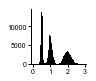

In [92]:
fig, ax = plt.subplots(figsize=(1, 1))
_ = ax.hist(data.clonal_marker.values, bins=np.arange(0, 3, .05), color='k')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
_ = ax.set_xticks([0,1,2,3])

savefig(fig, 'replicate_overall_distribution')

In [93]:
from clones.annotation.bayesian import BayesianClassifier

In [95]:
model = BayesianClassifier(data.clonal_marker.values)

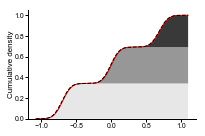

In [102]:
fig = model.plot_cdfs(log=True, rasterized=True)
savefig(fig, 'replicate_overall_fits')

### Difficult example

In [5]:
path = '../../../data/synthetic/sweeps/Sweep_181201_191516/'
sweep = Sweep.load(path)
benchmarks = SweepBenchmark.load(path)
benchmark = benchmarks.load_benchmark(0, 6)

In [6]:
savedir = './graphics/benchmarking/'
savefig = lambda fig, name: fig.savefig(join(savedir, '{:s}.pdf'.format(name)), dpi=400, rasterized=True, transparent=True)

Plot sampled fluorescence levels.

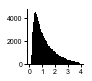

In [62]:
data = benchmark.measure()
fig, ax = plt.subplots(figsize=(1, 1))
_ = ax.hist(data.clonal_marker.values, bins=np.arange(0, 4, .05), color='k')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
_ = ax.set_xticks([0,1,2,3,4])

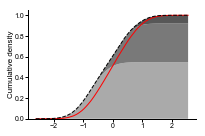

In [7]:
from clones.annotation.bayesian import BayesianClassifier
_ = benchmark.classifier.plot_cdfs(log=True, rasterized=True)

Plot generating model PDFs versus inferred model PDFs

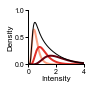

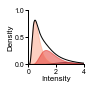

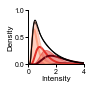

In [9]:
from growth.measure.sampling import MultiLognormalSampler
sampler = MultiLognormalSampler(benchmark.ambiguity)

fig0, ax0 = plt.subplots(figsize=(1, 1))
_ = sampler.show_pdf(ax=ax0, cmap=plt.cm.Reds, component_lw=1, include_composite=True, composite_lw=1.)

fig1, ax1 = plt.subplots(figsize=(1, 1))
benchmark.classifier.plot_pdfs(ax=ax1, cmap=plt.cm.Reds)

fig2, ax2 = plt.subplots(figsize=(1, 1))
_ = sampler.show_pdf(ax=ax2, cmap=plt.cm.Reds, component_lw=1, include_composite=True, composite_lw=1.)
benchmark.classifier.plot_pdfs(ax=ax2, cmap=plt.cm.Reds)

for ax in (ax0, ax1, ax2):
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 1.)
    ax.set_xlabel('Intensity')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
savefig(fig0, 'failure_ground_truth')
savefig(fig1, 'failure_model_fit')
savefig(fig2, 'failure_superimposed')

In [10]:
benchmark.ambiguity

0.4600000000000001

# Synthetic benchmarking

In [6]:
from clones.validation.sweep import Sweep, SweepBenchmark

path = '../../../data/synthetic/sweeps/Sweep_181201_191516/'
sweep = Sweep.load(path)
benchmarks = SweepBenchmark.load(path)

In [40]:
savedir = './graphics/benchmarking/'
savefig = lambda fig, name: fig.savefig(join(savedir, '{:s}.pdf'.format(name)), dpi=400, rasterized=True, transparent=True)

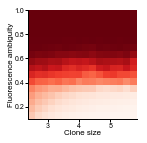

In [42]:
fig, ax = plt.subplots(figsize=(2, 2))
_ = benchmarks.results.plot_absolute_error(ax=ax, method='community', log=False, vmin=0., vmax=.5, cmap=plt.cm.Reds)
#_ = benchmarks.results.plot_relative_error(ax=ax, method='community', vmin=-3., vmax=3, cmap=plt.cm.seismic)
trends = GrowthTrends(sweep._results)
mean_clone_size = np.log(trends.means.mean_clone_size.values)
xvals = mean_clone_size[::-1]
yvals = benchmarks.ambiguities
ax.images[0].set_extent([xvals.min(), xvals.max(), yvals.max(), yvals.min()])
ax.invert_yaxis()
ax.set_aspect(xvals.ptp()/yvals.ptp())
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#savefig(fig, 'community_absolute')

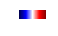

In [55]:
aspect=3
length = 0.5
fig, ax = plt.subplots(figsize=(length, length/aspect))
yy,xx = np.meshgrid(np.arange(0, 1, 0.01), np.arange(0, 1/aspect, 0.01))
ax.imshow(yy, cmap=plt.cm.seismic, vmin=0, vmax=1)
ax.axis('off')
savefig(fig, 'relative_colorscale')

# testing

In [14]:
from clones.validation.sweep import Sweep, SweepBenchmark

path = '../../../data/synthetic/sweeps/Sweep_181201_191516/'
sweep = Sweep.load(path)
benchmarking = SweepBenchmark.load(path)

#benchmarking.save(join(benchmarking.path, 'benchmark_job.pkl'))
#benchmarking.aggregate()

In [16]:
from os.path import join
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [17]:
def plot_grid(benchmarking, method='labels', relative=False, reference='levels_only'):
    fig, ax = plt.subplots(figsize=(2, 2))
    
    if not relative:
        _ = benchmarking.results.plot_absolute_error(ax=ax, method=method, log=False, vmin=0., vmax=0.33, cmap=plt.cm.Reds)
    else:
        _ = benchmarking.results.plot_relative_error(ax=ax, method=method, reference_method=reference, vmin=-3., vmax=3, cmap=plt.cm.seismic)

    # format axis
    trends = GrowthTrends(sweep._results)
    mean_clone_size = np.log(trends.means.mean_clone_size.values)
    xvals = mean_clone_size[::-1]
    yvals = benchmarking.ambiguities
    ax.images[0].set_extent([xvals.min(), xvals.max(), yvals.max(), yvals.min()])
    ax.invert_yaxis()
    ax.set_aspect(xvals.ptp()/yvals.ptp())
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

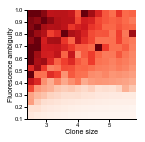

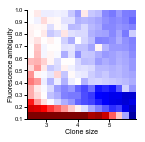

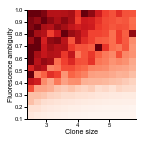

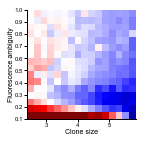

In [18]:
plot_grid(benchmarking, method='labels', relative=False)
plot_grid(benchmarking, method='labels', relative=True)
plot_grid(benchmarking, method='labels_comm', relative=False)
plot_grid(benchmarking, method='labels_comm', relative=True)
#plot_grid(benchmarking, method='labels', reference='spatial_only', relative=True)

In [20]:
benchmarking.results.data.loc[0,5,10]

labels          0.344733
levels_only     0.331592
spatial_only    0.329485
labels_comm     0.350644
Name: (0, 5, 10), dtype: float64

In [334]:
batch_id = 5
ambiguity_id = 10
job = benchmarking.load_job(batch_id, ambiguity_id)

batch = sweep.batches[0, batch_id]
simulation = batch.load_simulation(10)
data = simulation.measure(ambiguity=job.ambiguity)
graph = job.build_graph(data)

In [337]:
sim = job.batch[0]

In [339]:
genotypes = np.hstack([sim.genotypes for sim in job.batch])

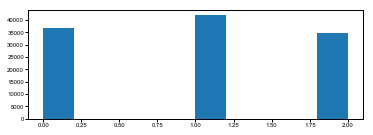

In [342]:
fig, ax = plt.subplots(figsize=(6, 2))

_ = ax.hist(genotypes)

In [351]:
job.params

{'annotator': <clones.annotation.annotation.Annotation at 0x11e20a438>,
 'attribute': 'clonal_marker',
 'logratio': True,
 'training_kw': {},
 'testing_kw': {}}

In [353]:
job.benchmark_simulation

In [29]:
values = np.repeat(data[job.attribute].values.reshape(-1, 1), 2, axis=1)
job.annotator.classifier.model.values = np.log(values)
job.annotator.classifier._values = values

In [324]:
job.annotator.classifier.model.means_

array([[ 9.94776071e-04, -3.85889781e-04],
       [-6.81553599e-01, -6.84995270e-01],
       [ 8.64533148e-01,  5.54547845e-01],
       [ 4.74220241e-01,  1.58583224e-01],
       [-8.10242362e-01, -5.57360296e-01],
       [-5.15036925e-01, -1.93493034e-01],
       [ 6.60375658e-01,  6.76996162e-01]])

In [325]:
job.annotator.classifier[0].model.means_

array([[ 0.00099478],
       [-0.6815536 ],
       [ 0.86453315],
       [ 0.47422024],
       [-0.81024236],
       [-0.51503692],
       [ 0.66037566]])

In [226]:
centroids = np.exp(job.annotator.classifier.model.means_)

In [37]:
from sklearn.cluster import k_means

In [328]:
n_init = 100
cluster_means, centroid_cluster_labels, _ = k_means(centroids, 3, n_init=n_init)

component_to_label = {}
for label, centroid_cluster_idx in enumerate(np.argsort(cluster_means.mean(axis=1))):
    for component_idx in (centroid_cluster_labels==centroid_cluster_idx).nonzero()[0]:
        component_to_label[component_idx] = label


centroid_component_idx = job.annotator.classifier.model.predict(centroids)
        
np.vectorize(component_to_label.get)(centroid_component_idx)

array([1, 1, 1, 1, 2, 2, 1])

In [333]:
centroid_component_idx

array([3, 3, 3, 3, 2, 2, 3])

In [329]:
centroids

array([[1.00099527, 0.99961418],
       [0.50583052, 0.50409261],
       [2.37389757, 1.74115354],
       [1.60676082, 1.17184945],
       [0.44475026, 0.57271888],
       [0.59747853, 0.82407558],
       [1.93551929, 1.96795742]])

In [330]:
centroid_cluster_labels

array([2, 0, 1, 2, 0, 0, 1], dtype=int32)

In [332]:
job.

In [315]:
job.annotator.classifier.model.weights_

array([0.12510639, 0.02756681, 0.06183984, 0.33924732, 0.08038291,
       0.32765221, 0.03820451])

In [ ]:
job.annotator.classifier.model.predict

In [242]:
for label, cluster_index in enumerate(np.argsort(cluster_means.mean(axis=1))):
    label

In [260]:
np.arange(len(cluster_labels))[cluster_labels==cluster_index]

array([2, 6])

In [261]:
(cluster_labels==cluster_index).nonzero()[0]

array([2, 6])

In [234]:
cluster_means.mean(axis=1)

array([1.19480493, 0.5748244 , 2.00463195])

In [230]:
centroids

array([[1.00099527, 0.99961418],
       [0.50583052, 0.50409261],
       [2.37389757, 1.74115354],
       [1.60676082, 1.17184945],
       [0.44475026, 0.57271888],
       [0.59747853, 0.82407558],
       [1.93551929, 1.96795742]])

In [225]:
component_to_label

{1: 0, 4: 0, 5: 0, 0: 1, 3: 1, 2: 2, 6: 2}

In [70]:
k_means(centroids, 3, n_init=10)

(array([[0.51601977, 0.63362902],
        [2.15470843, 1.85455548],
        [1.30387805, 1.08573182]]),
 array([2, 0, 1, 2, 0, 0, 1], dtype=int32),
 0.3886945125470259)

In [ ]:
@property
def centroids(self):
    """ Means of each component on linear scale (not log transformed). """
    centroids = self.means
    if self.log:
        centroids = np.exp(centroids)
    return centroids.reshape(-1, 1)

@property
def component_to_label(self):
    """
    Returns dictionary mapping components to labels.  Mapping is achieved by k-means clustering the model centroids (linear scale).
    """
    n = self.num_labels

    cluster_means, cluster_labels, _ = k_means(self.centroids, n)
    component_to_label = {}
    for label, c in enumerate(np.argsort(cluster_means.ravel())):
        for d in (cluster_labels==c).nonzero()[0]:
            component_to_label[d] = label
    return component_to_label

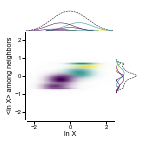

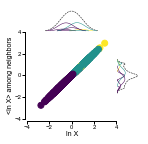

In [30]:
_ = job.annotator.classifier.plot_bivariate_pdf()
_ = job.annotator.classifier.plot_bivariate_data()

In [361]:
labels = job.annotator.annotate(graph)

In [362]:
from clones.annotation.spatial.sampling import RadialSampler

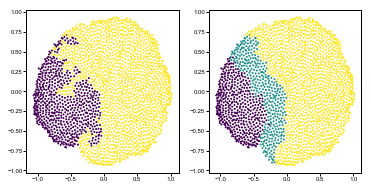

In [363]:
#labels = job.annotator.annotate(graph, bivariate_only=True, sa)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(6, 3))
ax0.scatter(*graph.node_positions_arr.T, c=graph.data.true_dosage, s=1)
ax1.scatter(*graph.node_positions_arr.T, c=labels, s=1)

In [329]:
simulation1 = batch.load_simulation(8)
data1 = simulation1.measure(ambiguity=0.7)
graph1 = job.build_graph(data1)

In [330]:
simulation2 = batch.load_simulation(3)
data2 = simulation2.measure(ambiguity=0.7)
graph2 = job.build_graph(data2)

In [331]:
annotator1 = Annotation('clonal_marker', max_num_components=6)
selector1 = annotator1.train(graph1)

In [332]:
annotator2 = Annotation('clonal_marker', max_num_components=6)
selector2 = annotator2.train(graph2)

In [333]:
annotator3 = Annotation('clonal_marker', max_num_components=6)
selector3 = annotator3.train(graph1, graph2)

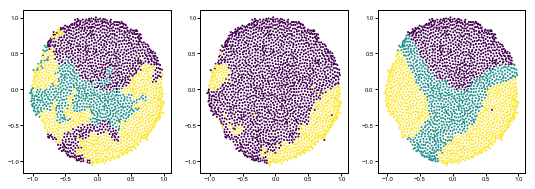

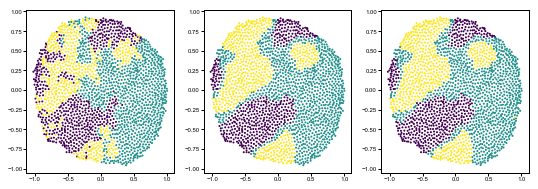

In [334]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(9, 3))
ax0.scatter(*graph1.node_positions_arr.T, c=graph1.data.true_dosage, s=1)
ax1.scatter(*graph1.node_positions_arr.T, c=annotator1.annotate(graph1), s=1)
ax2.scatter(*graph1.node_positions_arr.T, c=annotator3.annotate(graph1), s=1)

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(9, 3))
ax0.scatter(*graph2.node_positions_arr.T, c=graph2.data.true_dosage, s=1)
ax1.scatter(*graph2.node_positions_arr.T, c=annotator2.annotate(graph2), s=1)
ax2.scatter(*graph2.node_positions_arr.T, c=annotator3.annotate(graph2), s=1)

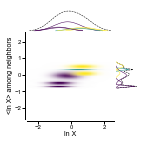

In [335]:
_ = annotator1.classifier.plot_bivariate_pdf()

In [3]:
from clones.validation.sweep import Sweep, SweepBenchmark

path = '../../../data/synthetic/sweeps/Sweep_181201_191516/'
sweep = Sweep.load(path)
benchmarking = SweepBenchmark.load(path)

In [4]:
batch_id = 14
ambiguity_id = 10
replicate_id = 0

job = benchmarking.load_job(batch_id, ambiguity_id)
batch = sweep.batches[0, batch_id]
simulation = batch.load_simulation(replicate_id)
data = simulation.measure(ambiguity=job.ambiguity)
graph = job.build_graph(data)

In [ ]:
class Trends:
    """ Class for extracting and plotting clone trends. """
    
    def __init__(self, data):
        """
        Instantiate object for parsing clones data.
        
        Args:
        
            data (pd.DataFrame)

        """
        self.data = data.replace([np.inf, -np.inf], np.nan)
        self.x = 2**self.means.recombination_start
        self.ylabels = {
            'num_clones': 'Number of clones',
            'mean_clone_size': 'Mean clone size',            
            'percent_heterozygous': 'Recombination extent',
            'transclone_edges': 'Trans-clone edges per cell',
            'clone_size_variation': 'Clone size variation'}
        
    @property
    def means(self):
        """ Mean values aggregated over replicates. """
        gb = self.data.groupby('column_id')
        return gb.mean()
    
    @property
    def stds(self):
        """ Std dev of values aggregated over replicates. """
        gb = self.data.groupby('column_id')
        return gb.std()
    
    @default_figure
    def plot_trend(self, yvar, ax=None, **kwargs):
        """ Plot <yvar> against recombination start generation. """
        
        # get y data
        y = self.means[yvar]
        ystd = self.stds[yvar]
        y_SEM = ystd / np.sqrt(sweep.num_replicates)
        
        # plot trend
        ax.errorbar(self.x, y, yerr=y_SEM, **kwargs)
        
        # format axis
        ax.set_xlabel('Recombination start (no. cells)')
        ylabel = ''
        if yvar in self.ylabels.keys():
            ylabel = self.ylabels[yvar]
        ax.set_ylabel(ylabel)
        ax.set_xscale('log', basex=2)
        ax.set_xticks([1,2,4,8,16,32,64,128,256,512])
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
